## Classify iris dataset

### Multi-class classification

#### Loss and activation functions

Cathegorical cross-entropy loss function is commonly used to address multi-class classification problems. The loss function for $C$ classes evaluated on the $N$ training points reads
$
L = - \sum_{j=1}^{N} \sum_{i=1}^{C} y^\text{true}_{i,j} \log (y_{i,j}^\text{pred}),
$
where $y^\text{true}_{i,j}$ is target value for $i$-th output for $j$-th sample and $y_{i,j}^\text{pred}$ is corresponding predicted value.


Softmax activation function  
$
f_\text{softmax} = \dfrac{e^{y_{i,j}^\text{pred}}}{\sum_{k=1}^{C} e^{y_{k,j}^\text{pred}}}
$

### Metrics

Accuracy is one of the most popular metrics in multi-class classification which can be directly calculated from the confusion matrix
$A = \dfrac{ \text{Number of predictions on the diagonal} }{ \text{Nummber of all predictions} }$.

For binary classification task accuracy reads as 

$
A = \dfrac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}},
$
where TP, TN, FP, FN are number of true-positive, true-negative, false-positive and false-negative predictions respectively.



> for TeX typesetting plese use [Markdown All in One](https://marketplace.visualstudio.com/items?itemName=yzhang.markdown-all-in-one) extension. 

In [51]:
import numpy as np 
import pandas as pd 

# plotting
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

# keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 

# utils
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix, roc_curve

sns.set_theme(style="white")
sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [2]:
def make_nn_classifier(input_dim):
    """ 
    Neural network based classifier,
    Args:
        input_dim: (int) the size of the input vectors
    """
    model = Sequential()
    layers = [
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ]

    for l in layers:
        model.add(l)
    
    # compile the keras model
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy'])

    return model


### Data

In [3]:
dataset = pd.read_csv('Iris.csv')
dataset.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
fig = px.scatter_3d(
                    dataset, 
                    x='sepal_length', 
                    y='sepal_width', 
                    z='petal_width', 
                    color='label'
                    )
fig.show()

In [74]:
X, Y_lbl = dataset.values[:, :4], dataset.values[:, 4]
classes = list(set(Y_lbl))

Y = (np.frompyfunc(lambda _: classes.index(_), 1, 1)(Y_lbl)).astype(int)
C = to_categorical(Y, num_classes=len(classes))

scaler_x = StandardScaler().fit(X)
Xsc = scaler_x.transform(X)

# train test split 
X_train, X_test, Y_train, Y_test = train_test_split(Xsc, C, test_size=0.2, random_state=42)


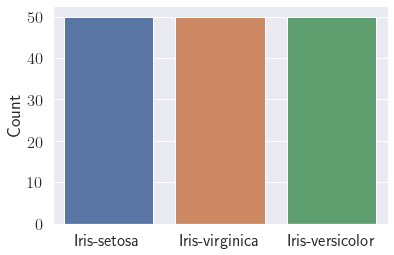

In [75]:
sns.barplot(
    x=classes, 
    y=[np.count_nonzero(Y == 0), 
       np.count_nonzero(Y == 1), 
       np.count_nonzero(Y == 2)]
    )
plt.ylabel('Count')
plt.show()

### Model Train and Evaluation

In [76]:
model = make_nn_classifier(4)

history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.3,
                    verbose=0
                   )


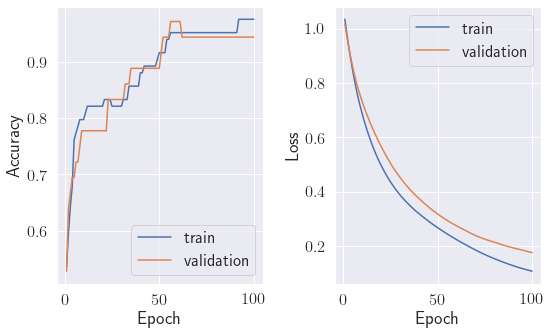

In [77]:
x = np.arange(1, len(history.history['accuracy']) + 1, 1)

fig, ax = plt.subplots(figsize=(8, 5)) 

plt.subplot(1,2,1)
sns.lineplot(x=x, y=history.history['accuracy'], label='train')
sns.lineplot(x=x, y=history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
sns.lineplot(x=x, y=history.history['loss'], label='train')
sns.lineplot(x=x, y=history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()

plt.show()

In [78]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.4f' % (accuracy * 100))


1/1 [==============================] - 0s 14ms/step - loss: 0.0913 - accuracy: 0.9667
Accuracy: 96.6667


In [79]:
Y_pred = model.predict(X_test)
Y_pred_lbls = [np.argmax(_) for _ in Y_pred]
Y_test_lbls = [np.argmax(_) for _ in Y_test]

# confusion matrix
cfmtrx = confusion_matrix(Y_test_lbls, Y_pred_lbls)


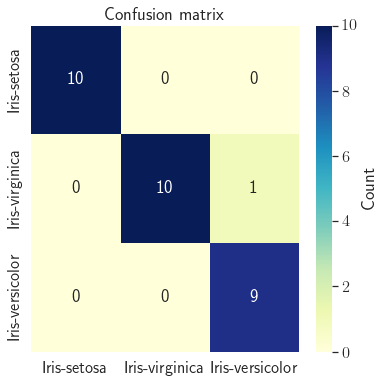

In [80]:

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(
    cfmtrx,
    xticklabels=classes,
    yticklabels=classes,
    cmap="YlGnBu",
    annot=True, 
    ax=ax,

    cbar_kws={'label': 'Count'}
    )
#plt.xticks(rotation=90)
plt.title('Confusion matrix')
plt.show()
